In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

## Question 1
##### 1.1)

In [2]:
def generic_grad(f, gf, lsearch, x0, eps):
    fs = []
    gs = []
    ts = []
    start = time()
    x_k = x0
    fs.append(f(x_k))
    gs.append(np.linalg.norm(gf(x_k)))
    ts.append(time()-start)
    while True:
        t = lsearch(f, x_k, gf(x_k))
        x_k_1 = x_k - t * gf(x_k)
        fs.append(f(x_k_1))
        gs.append(np.linalg.norm(gf(x_k_1)))
        ts.append(time()-start)
        if abs(f(x_k)-f(x_k_1)) <= eps:
            break
        x_k = x_k_1
    fs = np.concatenate(fs, axis=0)
    gs = np.array(gs)
    return x_k_1, fs, gs, ts

##### 1.2)

In [3]:
def const_step(s):
    if s <= 0:
        raise ValueError("S should be positive.")

    def inner_func(f, xk, gk):
        return s

    return inner_func

In [4]:
def exact_quad(A):
    try:
        np.linalg.cholesky(A)

        def inner_func(f, xk, gk):
            return 0.5 * ((np.linalg.norm(gk) / np.linalg.norm(A @ gk)) ** 2)

        return inner_func
    except:
        raise ValueError("A Incompatable")

In [5]:
def back(alpha, beta, s):
    if alpha <= 0 or beta <= 0 or alpha >= 1 or beta >= 1 or s <= 0:
        raise ValueError("Incompatible values.")

    def inner_func(f, xk, gk):
        t = s
        while f(xk - t * gk) >= f(xk) - alpha * t * np.linalg.norm(gk) ** 2:
            t *= beta
        return t

    return inner_func

##### 1.3)

In [6]:
A = np.arange(1, 26).reshape((5, 5))
np.fill_diagonal(A, 100)
f = lambda x: x.T @ A.T @ A @ x
gf = lambda x: 2 * A.T @ A @ x
x0 = np.ones((5, 1))
s = 1 / (2 * max(np.linalg.eigvals(A.T @ A)))

In [7]:
x1, fs1, gs1, ts1 = generic_grad(f, gf, const_step(s), x0, 10 ** -5)

In [8]:
x2, fs2, gs2, ts2 = generic_grad(f, gf, exact_quad(A), x0, 10 ** -5)

In [9]:
x3, fs3, gs3, ts3 = generic_grad(f, gf, back(0.5, 0.5, 1), x0, 10 ** -5)

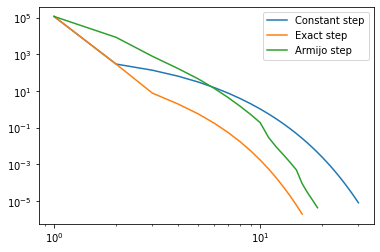

In [10]:
plt.loglog(np.linspace(1,len(ts1),len(ts1)),fs1, label="Constant step")
plt.loglog(np.linspace(1,len(ts2),len(ts2)),fs2, label="Exact step")
plt.loglog(np.linspace(1,len(ts3),len(ts3)),fs3, label="Armijo step")
plt.legend()
plt.show()

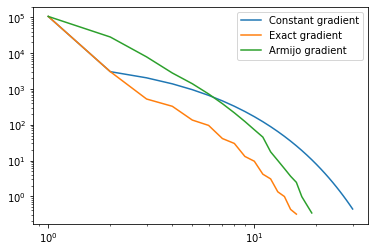

In [11]:
plt.loglog(np.linspace(1,len(ts1),len(ts1)),gs1, label="Constant gradient")
plt.loglog(np.linspace(1,len(ts2),len(ts2)),gs2, label="Exact gradient")
plt.loglog(np.linspace(1,len(ts3),len(ts3)),gs3, label="Armijo gradient")
plt.legend()
plt.show()

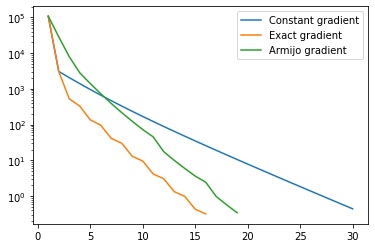

In [15]:
plt.semilogy(np.linspace(1,len(ts1),len(ts1)), gs1, label="Constant gradient")
plt.semilogy(np.linspace(1,len(ts2),len(ts2)), gs2, label="Exact gradient")
plt.semilogy(np.linspace(1,len(ts3),len(ts3)), gs3, label="Armijo gradient")
plt.legend()
plt.show()